# Домашна задача 3 - Фамилии во Фиренца
## Виртуелни општества 2018/2019
### Андреј Јанчевски - 151003

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap
import networkx as nx
import sys
sys.path.append('using_networkx')
from community_jolleycraig import detect_communities, split_communities, new_draw_nodes

In [2]:
ff_graph = nx.florentine_families_graph()
num_nodes=ff_graph.number_of_nodes()
num_edges=ff_graph.number_of_edges()
num_nodes, num_edges

(15, 20)

In [7]:
ff_graph.nodes

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


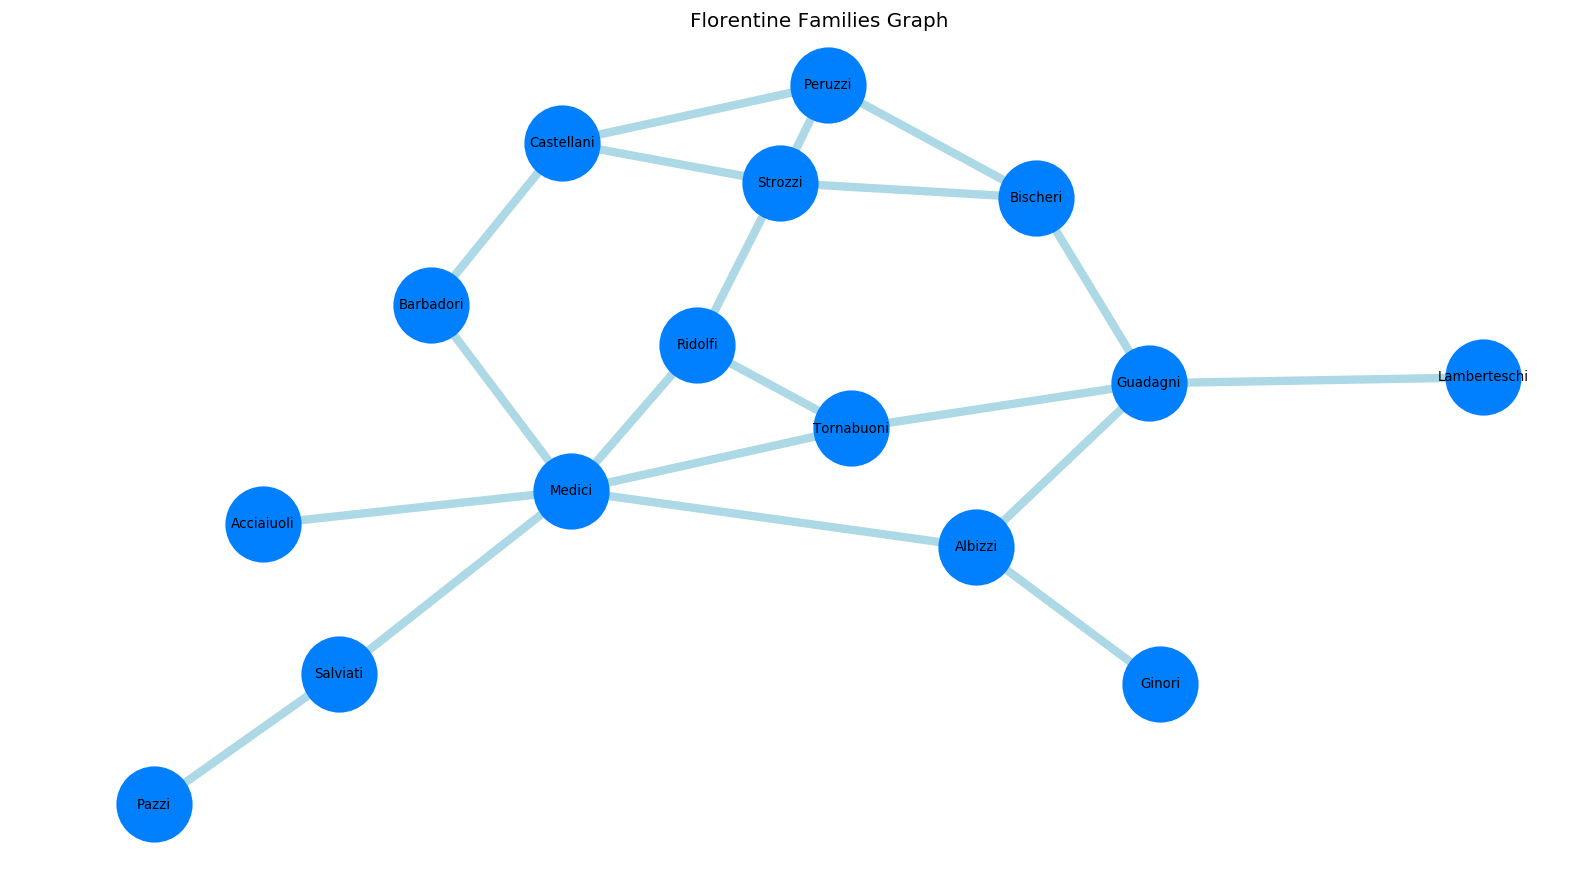

In [18]:
node_label_mapping = dict([(node, node) for node in list(ff_graph.nodes)])
ff_graph = nx.relabel_nodes(ff_graph, node_label_mapping)
node_positions = nx.drawing.layout.spring_layout(
    ff_graph, seed=57, iterations=5000, k=10)
plt.figure(1, (16, 9), dpi=int(1920 / 16))
nx.draw_networkx_nodes(
    ff_graph,
    pos=node_positions,
    node_size=2000,
    node_color=((0, 0.5, 1, 1), ),
    cmap=plt.get_cmap("cool"))
nx.draw_networkx_labels(ff_graph, pos=node_positions, font_size=8)
nx.draw_networkx_edges(
    ff_graph,
    pos=node_positions,
    width=5,
    edge_color="lightblue",
    edge_cmap=plt.get_cmap("cool"))
plt.title("Florentine Families Graph", fontsize=12)
plt.axis('off')
plt.show()

In [33]:
bc = nx.betweenness_centrality(ff_graph)
sorted(bc.items(), key=lambda x: x[1], reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410257),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0)]

In [34]:
rwbc = nx.current_flow_betweenness_centrality(ff_graph)
sorted(rwbc.items(), key=lambda x: x[1], reverse=True)

[('Medici', 0.5989465832181067),
 ('Guadagni', 0.36689469470926445),
 ('Albizzi', 0.26495524343206467),
 ('Strozzi', 0.23073284331562494),
 ('Ridolfi', 0.21193872352812754),
 ('Bischeri', 0.2084819154355579),
 ('Tornabuoni', 0.19934866458045272),
 ('Castellani', 0.17465977730878396),
 ('Barbadori', 0.15695728112946658),
 ('Salviati', 0.14285714285714302),
 ('Peruzzi', 0.12956662542755254),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', -1.2200253017858864e-18)]

In [35]:
split_communities(ff_graph)
coms = set(ff_graph.node[n]['Community'] for n in ff_graph.nodes())
print('Communities:', coms)
colors = [x for x in mcolors.CSS4_COLORS.values()]
color_seq = np.random.choice(colors, len(coms)).tolist()

ff_graph_color_dict, ff_graph_pos = new_draw_nodes(
    ff_graph,
    cls_attr='Community',
    prog='fdp',
    color_seq=color_seq,
    with_labels=True,
    show=True,
    use_graphviz=False)

KeyError: 0

In [37]:
sorted_nodes = sorted(
    ff_graph.nodes(data=True), key=lambda x: x[1]['Community'])
dim = len(sorted_nodes)
matrix = np.zeros((dim, dim))
for i in range(dim):
    for j in range(i + 1, dim):
        if ff_graph.has_edge(sorted_nodes[i][0], sorted_nodes[j][0]):
            if sorted_nodes[i][1]['Community'] != sorted_nodes[j][1][
                    'Community']:
                matrix[i][j] = matrix[j][i] = 1
            else:
                matrix[i][j] = matrix[j][
                    i] = sorted_nodes[i][1]['Community'] + 2

cmap = ListedColormap(['whitesmoke'] + ['navy'] + color_seq)
plt.figure(1, figsize=(9, 9), dpi=1080 / 9)
plt.title("Florentine Families Interaction Matrix")
plt.matshow(matrix, cmap=cmap)
plt.show()

KeyError: 'Community'